Playing with weather and cyclist data
testing combining datasts

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# temperetures from Finnish Meteorological institute
# now just 2018 and 2019. The set 2014 -2019 was too large
temperatures = pd.read_csv('csv-2e095d1c-25fe-44a6-9597-23e9bd2ba4ec.csv')

# cyclist amounts from ...
# check the timefarme
#hkicyclists = pd.read_excel('Helsingin_pyorailijamaarat.xlsx')

#a = pd.read_csv('https://github.com/srenoes/ShortCut-HSL-group-work/blob/master/Katariina/HelsinkiBikers_cleanDataset.csv')

cyclisthki = pd.read_csv('HelsinkiBikers_cleanDataset_20200320.csv')




In [3]:
temperatures = temperatures[temperatures.Year == 2018]

In [4]:
cyclisthki = cyclisthki[cyclisthki.Date.str[0:4] == '2018']

In [5]:
cyclisthki.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 35064 to 43823
Data columns (total 23 columns):
Weekday                           8760 non-null object
Date                              8760 non-null object
Time                              8760 non-null object
Auroransilta                      8759 non-null float64
Etelaesplanadi                    8759 non-null float64
Huopalahti (station)              8760 non-null float64
Kaisaniemi/Elaintarhanlahti       8760 non-null float64
Kaivokatu                         8759 non-null float64
Kulosaari bridge south            8760 non-null float64
Kulosaaren silta po.              8760 non-null float64
Kuusisaarentie                    8760 non-null float64
Kapyla, Pohjoisbaana              8759 non-null float64
Lauttasaarin bridge south side    8760 non-null float64
Merikannontie                     8760 non-null float64
Munkkiniemi bridge south side     8760 non-null float64
Munkkiniemi bridge north side     8760 non-null flo

In [6]:
cyclisthki.head()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
35064,Mon,2018-01-01,00:00:00,6.0,9.0,0.0,4.0,8.0,0.0,11.0,...,4.0,4.0,5.0,19.0,14.0,10.0,7.0,1.0,0.0,8
35065,Mon,2018-01-01,01:00:00,3.0,6.0,0.0,2.0,12.0,0.0,2.0,...,5.0,5.0,1.0,6.0,5.0,5.0,3.0,5.0,0.0,4
35066,Mon,2018-01-01,02:00:00,0.0,6.0,1.0,2.0,6.0,0.0,0.0,...,1.0,1.0,0.0,9.0,2.0,6.0,4.0,3.0,2.0,5
35067,Mon,2018-01-01,03:00:00,0.0,2.0,1.0,3.0,3.0,0.0,1.0,...,6.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,0.0,4
35068,Mon,2018-01-01,04:00:00,0.0,1.0,0.0,8.0,2.0,0.0,2.0,...,0.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,3


In [7]:
temperatures.tail()
#temperatures.head()

,Year,m,d,Time,Time zone,Snow depth (cm),Air temperature (degC),Wind direction (deg),Wind speed (m/s)
8755,2018,12,31,19:00,UTC,0.0,0.9,209.0,8.6
8756,2018,12,31,20:00,UTC,0.0,1.0,207.0,8.8
8757,2018,12,31,21:00,UTC,0.0,1.3,207.0,9.5
8758,2018,12,31,22:00,UTC,0.0,0.8,200.0,7.6
8759,2018,12,31,23:00,UTC,2.0,1.1,204.0,8.6


In [8]:
# what are the datatypes?
temperatures.info()
#Year, m and d: Int
# Time: str

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 9 columns):
Year                      8760 non-null int64
m                         8760 non-null int64
d                         8760 non-null int64
Time                      8760 non-null object
Time zone                 8760 non-null object
Snow depth (cm)           8699 non-null float64
Air temperature (degC)    8758 non-null float64
Wind direction (deg)      8558 non-null float64
Wind speed (m/s)          8557 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 684.4+ KB


In [9]:
# IS THIS A TOO CLUMSY WAY 
#from int to str
temperatures["Year"] = temperatures["Year"].apply(str)
temperatures["m"] = temperatures["m"].apply(str)
temperatures["d"] = temperatures["d"].apply(str)
# add 0:s in front - is teheer a better way?
temperatures['m'] = np.where(temperatures.m < "10", "0"+temperatures.m, temperatures.m)
temperatures['d'] = np.where(temperatures.d < "10", "0"+temperatures.d, temperatures.d)
# checking, ok temperatures.info() 
# combine
temperatures["date"] = temperatures["Year"]+"-"+temperatures["m"]+"-"+temperatures["d"]
temperatures.head()

,Year,m,d,Time,Time zone,Snow depth (cm),Air temperature (degC),Wind direction (deg),Wind speed (m/s),date
0,2018,01,01,00:00,UTC,0.0,0.9,152.0,3.3,2018-01-01
1,2018,01,01,01:00,UTC,0.0,0.9,147.0,3.9,2018-01-01
2,2018,01,01,02:00,UTC,0.0,0.5,154.0,3.7,2018-01-01
3,2018,01,01,03:00,UTC,0.0,0.4,155.0,3.9,2018-01-01
4,2018,01,01,04:00,UTC,2.0,0.3,159.0,3.5,2018-01-01


In [10]:
temperatures.columns=['Year','m','d','Time','TimeZone','SnowDepth(cm)','AirTemperature(degC)','WindDirection(deg)','WindSpeed(m/s)','Date']

In [11]:
temperatures.head()

,Year,m,d,Time,TimeZone,SnowDepth(cm),AirTemperature(degC),WindDirection(deg),WindSpeed(m/s),Date
0,2018,01,01,00:00,UTC,0.0,0.9,152.0,3.3,2018-01-01
1,2018,01,01,01:00,UTC,0.0,0.9,147.0,3.9,2018-01-01
2,2018,01,01,02:00,UTC,0.0,0.5,154.0,3.7,2018-01-01
3,2018,01,01,03:00,UTC,0.0,0.4,155.0,3.9,2018-01-01
4,2018,01,01,04:00,UTC,2.0,0.3,159.0,3.5,2018-01-01


In [12]:
temperatures = temperatures[['Date','Time','AirTemperature(degC)', 'SnowDepth(cm)','WindSpeed(m/s)','WindDirection(deg)']]

In [13]:
temperatures.head()

,Date,Time,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg)
0,2018-01-01,00:00,0.9,0.0,3.3,152.0
1,2018-01-01,01:00,0.9,0.0,3.9,147.0
2,2018-01-01,02:00,0.5,0.0,3.7,154.0
3,2018-01-01,03:00,0.4,0.0,3.9,155.0
4,2018-01-01,04:00,0.3,2.0,3.5,159.0


In [14]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 6 columns):
Date                    8760 non-null object
Time                    8760 non-null object
AirTemperature(degC)    8758 non-null float64
SnowDepth(cm)           8699 non-null float64
WindSpeed(m/s)          8557 non-null float64
WindDirection(deg)      8558 non-null float64
dtypes: float64(4), object(2)
memory usage: 479.1+ KB


In [15]:
cyclisthki.head()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
35064,Mon,2018-01-01,00:00:00,6.0,9.0,0.0,4.0,8.0,0.0,11.0,...,4.0,4.0,5.0,19.0,14.0,10.0,7.0,1.0,0.0,8
35065,Mon,2018-01-01,01:00:00,3.0,6.0,0.0,2.0,12.0,0.0,2.0,...,5.0,5.0,1.0,6.0,5.0,5.0,3.0,5.0,0.0,4
35066,Mon,2018-01-01,02:00:00,0.0,6.0,1.0,2.0,6.0,0.0,0.0,...,1.0,1.0,0.0,9.0,2.0,6.0,4.0,3.0,2.0,5
35067,Mon,2018-01-01,03:00:00,0.0,2.0,1.0,3.0,3.0,0.0,1.0,...,6.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,0.0,4
35068,Mon,2018-01-01,04:00:00,0.0,1.0,0.0,8.0,2.0,0.0,2.0,...,0.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,3


In [16]:
cyclisthki.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 35064 to 43823
Data columns (total 23 columns):
Weekday                           8760 non-null object
Date                              8760 non-null object
Time                              8760 non-null object
Auroransilta                      8759 non-null float64
Etelaesplanadi                    8759 non-null float64
Huopalahti (station)              8760 non-null float64
Kaisaniemi/Elaintarhanlahti       8760 non-null float64
Kaivokatu                         8759 non-null float64
Kulosaari bridge south            8760 non-null float64
Kulosaaren silta po.              8760 non-null float64
Kuusisaarentie                    8760 non-null float64
Kapyla, Pohjoisbaana              8759 non-null float64
Lauttasaarin bridge south side    8760 non-null float64
Merikannontie                     8760 non-null float64
Munkkiniemi bridge south side     8760 non-null float64
Munkkiniemi bridge north side     8760 non-null flo

In [17]:
cyclisthki['Time'] = cyclisthki.Time.str[0:5]
cyclisthki.head()

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
35064,Mon,2018-01-01,00:00,6.0,9.0,0.0,4.0,8.0,0.0,11.0,...,4.0,4.0,5.0,19.0,14.0,10.0,7.0,1.0,0.0,8
35065,Mon,2018-01-01,01:00,3.0,6.0,0.0,2.0,12.0,0.0,2.0,...,5.0,5.0,1.0,6.0,5.0,5.0,3.0,5.0,0.0,4
35066,Mon,2018-01-01,02:00,0.0,6.0,1.0,2.0,6.0,0.0,0.0,...,1.0,1.0,0.0,9.0,2.0,6.0,4.0,3.0,2.0,5
35067,Mon,2018-01-01,03:00,0.0,2.0,1.0,3.0,3.0,0.0,1.0,...,6.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,0.0,4
35068,Mon,2018-01-01,04:00,0.0,1.0,0.0,8.0,2.0,0.0,2.0,...,0.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,3


In [18]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 6 columns):
Date                    8760 non-null object
Time                    8760 non-null object
AirTemperature(degC)    8758 non-null float64
SnowDepth(cm)           8699 non-null float64
WindSpeed(m/s)          8557 non-null float64
WindDirection(deg)      8558 non-null float64
dtypes: float64(4), object(2)
memory usage: 479.1+ KB


In [21]:
cyclisthki.columns

Index(['Weekday', 'Date', 'Time', 'Auroransilta', 'Etelaesplanadi',
       'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti', 'Kaivokatu',
       'Kulosaari bridge south', 'Kulosaaren silta po. ', 'Kuusisaarentie',
       'Kapyla, Pohjoisbaana', 'Lauttasaarin bridge south side',
       'Merikannontie', 'Munkkiniemi bridge south side',
       'Munkkiniemi bridge north side', 'Heperia park/Ooppera',
       'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')

In [23]:
testcyclists = cyclisthki[['Date', 'Time', 'Auroransilta', 'Etelaesplanadi',
       'Huopalahti (station)', 'Kaisaniemi/Elaintarhanlahti', 'Kaivokatu',
       'Kulosaari bridge south', 'Kulosaaren silta po. ', 'Kuusisaarentie',
       'Kapyla, Pohjoisbaana', 'Lauttasaarin bridge south side',
       'Merikannontie', 'Munkkiniemi bridge south side',
       'Munkkiniemi bridge north side', 'Heperia park/Ooppera',
       'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana']]
testcyclists. head()

,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,Kuusisaarentie,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
35064,2018-01-01,00:00,6.0,9.0,0.0,4.0,8.0,0.0,11.0,0.0,...,4.0,4.0,5.0,19.0,14.0,10.0,7.0,1.0,0.0,8
35065,2018-01-01,01:00,3.0,6.0,0.0,2.0,12.0,0.0,2.0,0.0,...,5.0,5.0,1.0,6.0,5.0,5.0,3.0,5.0,0.0,4
35066,2018-01-01,02:00,0.0,6.0,1.0,2.0,6.0,0.0,0.0,2.0,...,1.0,1.0,0.0,9.0,2.0,6.0,4.0,3.0,2.0,5
35067,2018-01-01,03:00,0.0,2.0,1.0,3.0,3.0,0.0,1.0,0.0,...,6.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,0.0,4
35068,2018-01-01,04:00,0.0,1.0,0.0,8.0,2.0,0.0,2.0,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0,3


In [24]:
temperatures.tail(3)

,Date,Time,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg)
8757,2018-12-31,21:00,1.3,0.0,9.5,207.0
8758,2018-12-31,22:00,0.8,0.0,7.6,200.0
8759,2018-12-31,23:00,1.1,2.0,8.6,204.0


In [25]:
testcyclists.tail(3)

,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaaren silta po.,Kuusisaarentie,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
43821,2018-12-31,21:00,1.0,0.0,1.0,2.0,4.0,1.0,4.0,1.0,...,7.0,5.0,0.0,5.0,1.0,2.0,NaN,10.0,NaN,5
43822,2018-12-31,22:00,1.0,1.0,3.0,2.0,5.0,1.0,3.0,0.0,...,0.0,0.0,0.0,7.0,5.0,5.0,NaN,8.0,NaN,7
43823,2018-12-31,23:00,3.0,1.0,1.0,3.0,10.0,0.0,2.0,3.0,...,0.0,1.0,1.0,7.0,5.0,8.0,NaN,1.0,NaN,2


In [26]:
wholeset = pd.merge(temperatures, testcyclists, how='left', on=['Date','Time'])

In [27]:
wholeset.tail()

,Date,Time,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg),Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/Elaintarhanlahti,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta itapuoli,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
8755,2018-12-31,19:00,0.9,0.0,8.6,209.0,3.0,8.0,8.0,3.0,...,6.0,8.0,4.0,12.0,4.0,8.0,NaN,4.0,NaN,2.0
8756,2018-12-31,20:00,1.0,0.0,8.8,207.0,1.0,2.0,4.0,1.0,...,2.0,3.0,0.0,11.0,6.0,8.0,NaN,7.0,NaN,9.0
8757,2018-12-31,21:00,1.3,0.0,9.5,207.0,1.0,0.0,1.0,2.0,...,7.0,5.0,0.0,5.0,1.0,2.0,NaN,10.0,NaN,5.0
8758,2018-12-31,22:00,0.8,0.0,7.6,200.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,7.0,5.0,5.0,NaN,8.0,NaN,7.0
8759,2018-12-31,23:00,1.1,2.0,8.6,204.0,3.0,1.0,1.0,3.0,...,0.0,1.0,1.0,7.0,5.0,8.0,NaN,1.0,NaN,2.0


In [30]:
wholeset.to_csv('Hki_Cyclists_and_Weather_2018.csv')

C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\seppo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


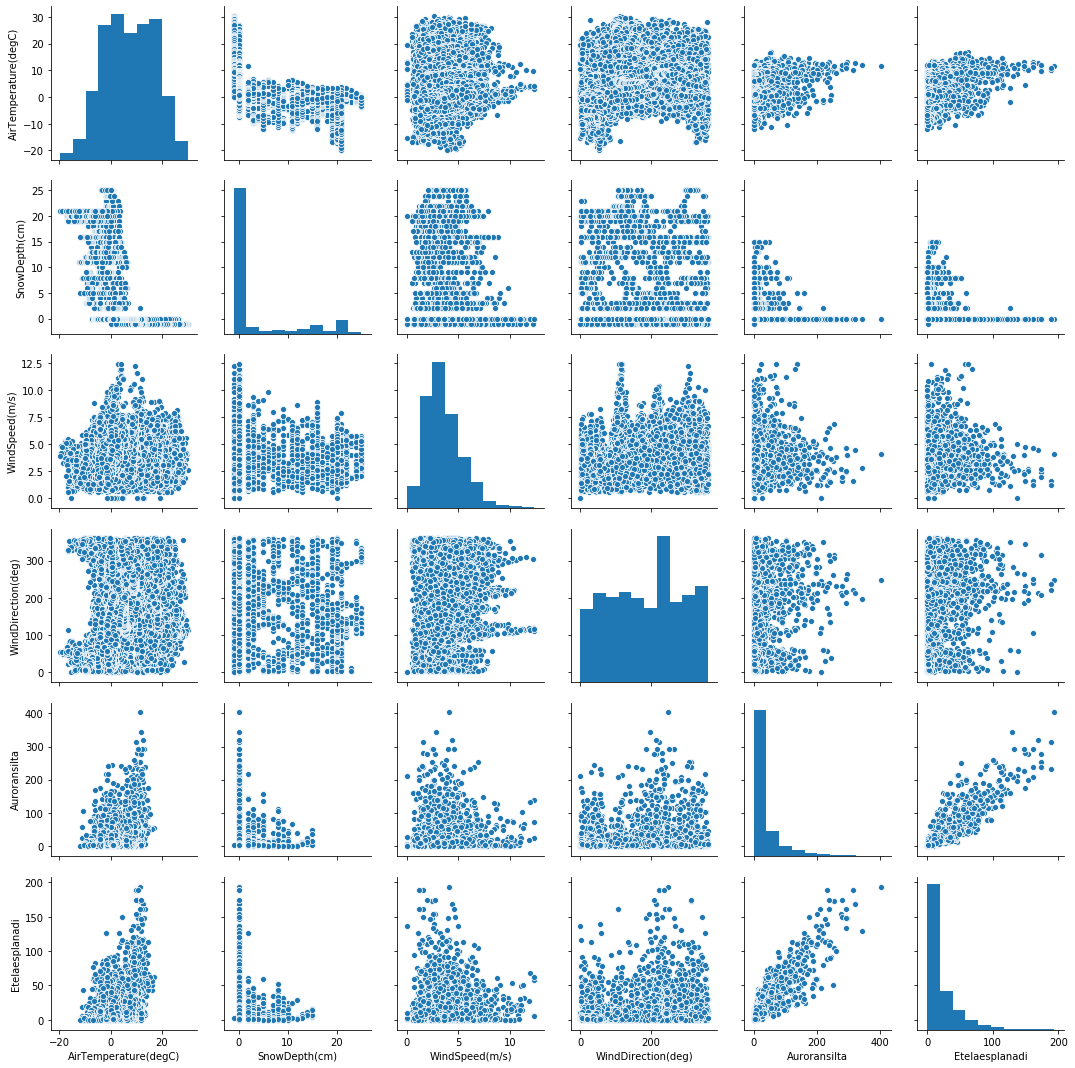

In [199]:
sns.pairplot(wholeset)

In [28]:
wholeset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 26 columns):
Date                              8760 non-null object
Time                              8760 non-null object
AirTemperature(degC)              8758 non-null float64
SnowDepth(cm)                     8699 non-null float64
WindSpeed(m/s)                    8557 non-null float64
WindDirection(deg)                8558 non-null float64
Auroransilta                      2184 non-null float64
Etelaesplanadi                    2184 non-null float64
Huopalahti (station)              2184 non-null float64
Kaisaniemi/Elaintarhanlahti       2184 non-null float64
Kaivokatu                         2184 non-null float64
Kulosaari bridge south            2184 non-null float64
Kulosaaren silta po.              2184 non-null float64
Kuusisaarentie                    2184 non-null float64
Kapyla, Pohjoisbaana              2184 non-null float64
Lauttasaarin bridge south side    2184 non-null float64

In [150]:
testcyclists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7296 entries, 43824 to 51119
Data columns (total 4 columns):
Date              7296 non-null object
Time              7296 non-null object
Auroransilta      7296 non-null float64
Etelaesplanadi    6650 non-null float64
dtypes: float64(2), object(2)
memory usage: 285.0+ KB


In [151]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 8760 to 17519
Data columns (total 6 columns):
Date                    8760 non-null object
Time                    8760 non-null object
AirTemperature(degC)    8751 non-null float64
SnowDepth(cm)           8749 non-null float64
WindSpeed(m/s)          8748 non-null float64
WindDirection(deg)      8748 non-null float64
dtypes: float64(4), object(2)
memory usage: 479.1+ KB


In [152]:
#sns.pairplot(temperatures)


In [153]:
temperatures.describe()


,AirTemperature(degC),SnowDepth(cm),WindSpeed(m/s),WindDirection(deg)
count,8751.000000,8749.000000,8748.000000,8748.000000
mean,7.458553,3.454681,3.926760,200.890032
std,8.181393,9.487503,1.770454,97.507909
min,-20.200000,-1.000000,0.000000,0.000000
25%,1.600000,-1.000000,2.700000,118.000000
50%,6.300000,0.000000,3.800000,214.500000
75%,14.500000,0.000000,5.000000,282.000000
max,32.900000,46.000000,11.900000,360.000000


In [154]:
hkicyclists.tail()


NameError: name 'hkicyclists' is not defined